# Project Assignment B 

## 1. Motivation

###  1.1 What is your dataset?

For the project, we are using the Melbourne housing data set which contains information about the housing market in Melbourne from 2016-2018. The dataset is 5Mb large and originally it consisted of 21 attributes and 34857 observations. 

### 1.1.1 Description of the attributes
Suburb: The suburbs in Melbourne.<br>
Address: The adress of each property in the data set.<br>
Rooms: Total number of rooms in each property.<br>
Type: Type of property (H=House, U=Unit, T=Townhouse).<br>
Price: Sold Price of each propery in AUD.<br>
Method: Method sold of each property (S - property sold, SP - property sold prior, PI - property passed in, PN - sold prior not disclosed, SN - sold not disclosed, NB - no bid, VB - vendor bid, W - withdrawn prior to auction, SA - sold after auction, SS - sold after auction price not disclosed).<br>
SellerG: The name of the seller.<br>
Date: The date each property was sold (2016-2018).<br>
Distance: Distance from central business district (CBD) in Kilometers.<br>
Postcode: The post code of the property.<br>
Bedroom2: Number of bedrooms in the property.<br> 
Bathroom: Numberof bathrooms in the property.<br>
Car: Number of carspots in the property.<br>
Landsize: Landsize in square meters.<br>
BuildingArea: Building Size in square meters.<br>
YearBuilt: Year where the property was built.<br>
CouncilArea: Governing council for the area.<br>
Lattitude: Lattitude of the property.<br>
Longtitude: Longtitude of the property.<br>
Regionname: Region where the property belongs.<br>
Propertycount: Number of properties in each suburb.<br>

### 1.2 Why did you choose this particular dataset?

The reason for selecting this data set is to examine what drives the house prices in Melbourne, what are the parameters that affect the price, and weather the housing market is in a bubble. With the available data, we can use advanced analytics to predict house prices and make it possible to review patterns to understand whether the property is a good investment and a great match to potential customer. 

### 1.3 What was your goal for the end user's experience?

The primary goal for the end user is to make informed decisions to buying a house or selling a house while keeping in mind important factors such as surrounding entities, distance from business districts various regions etc. The value of this analytics project is for people to reduce risk of buying and selling and predicting changes in home value for potential buyers. The ultimate goal, is to gain insights on the housing market trends that can also be applicable to the housing market in Copenhagen. As a citizen in Copenhagen for a few years, I have realized increasing rental prices each year. When I am to make a decision to buy a house, I want to know whether it is the right moment or not and where the right place is. In the Melbourne housing data set, we would also like to examine if there are specific regions where prices are increasing over time and regions where prices are declining. Increasing prices per region might suggest that it is a developing area which can potentially be a good investment. 

In [505]:

import pandas as pd
import numpy as np
import csv
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import ipywidgets as widgets
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly import tools
import folium
from sklearn.utils.multiclass import unique_labels
from folium import plugins
import calendar
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor
from scipy import linalg
from scipy import special
from scipy.stats import skew
from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.colors as colors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)

In [506]:
d = pd.read_csv('MEL2.csv')
#number of rows and columns
r,c = d.shape
print('The original dataset has', r,'rows and',c,'columns')
names=list(d.columns)

The original dataset has 34857 rows and 21 columns


## 2. Basic Stats

### 2.1 Choices in data cleaning and pre processing

In [507]:
#count missing values in each column
miss_values = d.isnull().sum()
#count columns with missing values
Miss_cols = (miss_values!=0).sum()
#number of rows with missing values
Miss_rows =d.isnull().any(axis=1).sum()
print('The missing values in each column are:\n',miss_values)

print('There are', Miss_cols,'columns with missing values and',Miss_rows,'rows with missing values.')

The missing values in each column are:
 Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64
There are 14 columns with missing values and 25970 rows with missing values.


Below is a visual inspection of the locations in the dataframe where there are missing values.

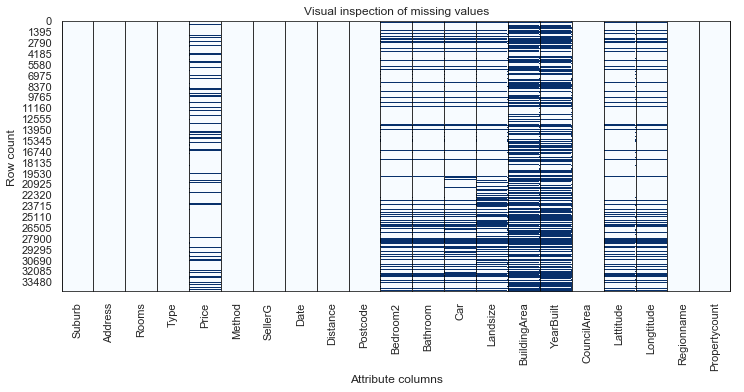

In [508]:
fig, ax = plt.subplots(figsize=(12,5))  
sns.heatmap(d.isnull(), ax=ax, cbar=False, cmap="Blues")
ax.vlines(range(c), *ax.get_ylim(),linewidths=0.8,color='black')
ax.axhline(y=0, color='k',linewidth=0.8)
ax.axhline(y=(r-150), color='k',linewidth=0.8)
ax.axvline(x=0, color='k',linewidth=0.8)
ax.axvline(x=c, color='k',linewidth=2)
plt.title('Visual inspection of missing values')
plt.xlabel('Attribute columns')
plt.ylabel('Row count')
plt.show()

There are several ways of how to handle th missing values. 1) Delete all the columns that contain missing values. 2) Delete all the rows that contain missing values. 3) Delete the columns 'BuildingArea' and 'Year built' where the most missing values are and then remove the rows that contain the missing values. 4) Impute the missing values with the median/mean. 5) Predict the missing values using machine learning algorithms. We decided to exclude options 1 and 3 since we will probably miss important information that drives the prices of the houses. We also decided to exclude options 4 and 5 because it will probably lead to innacurate results  by imputing that large number of missing values. The only option left is remove all the rows with missing values.

In [509]:
#Removing all the rows with missing values
d = d.dropna().reset_index(drop=True)

In the dataframe, there are also some columns that we do not find any use for them in our analysis, so we will delete them as well. Those are the 'Adress', 'SellerG', 'Postcode', 'Propertycount'.

In [510]:
#Dropping unnecessary columns
d = d.drop(["Address", "SellerG",'Postcode','Propertycount'], axis=1)

We would also like to investigate if there are any outliers and remove them from the analysis as well. We will create box plots to visualize cases with extreme outliers. For that reason we pick only the columns with numerical variables

In [511]:
#Selecting columns for outlier detection
k = ['Rooms','Price','Distance','Bathroom','Car','BuildingArea','YearBuilt','Landsize']

In [512]:
#Creating a data frame with only the attributes for outlier detection
Outlier = d[k]

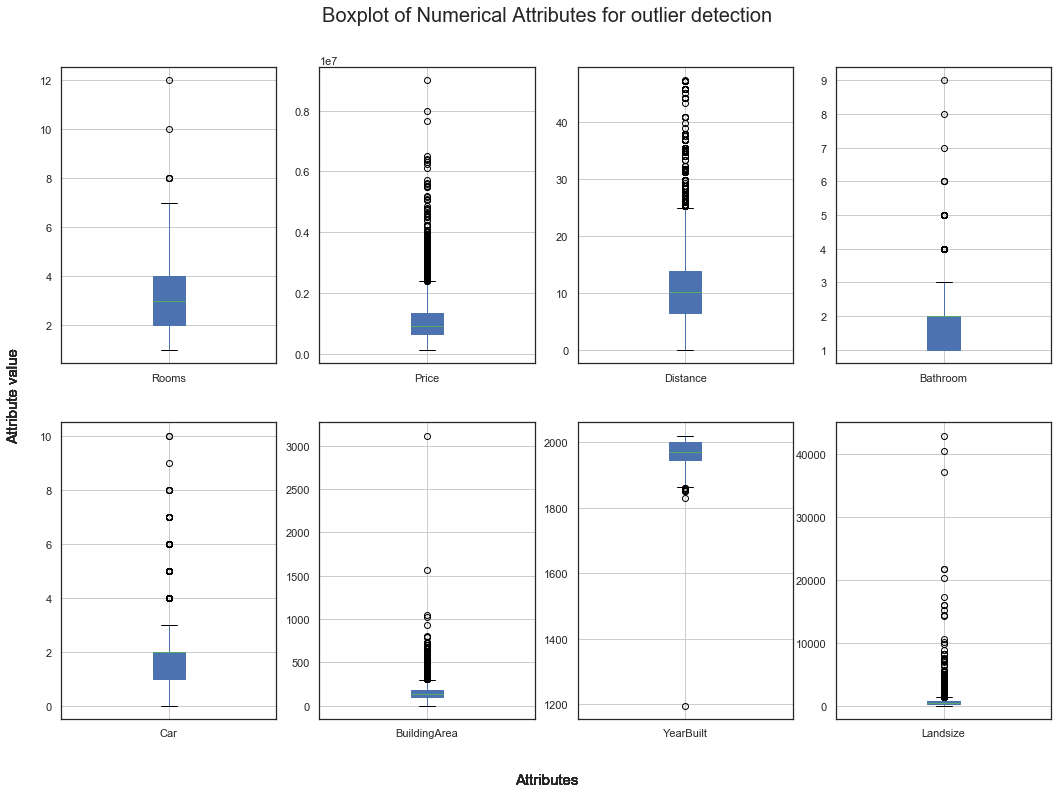

In [513]:
fig, axes = plt.subplots(2,4,figsize=(10,12))
for i,el in enumerate(list(Outlier.columns.values)):
    a = Outlier.boxplot(el, patch_artist=True, ax=axes.flatten()[i]) 
    fig.text(0.8, 0.05, 'Attributes', ha='center', fontsize=15)
    fig.text(0.05, 0.5, 'Attribute value', va='center', rotation='vertical', fontsize=15)
plt.subplots_adjust(right=1.5) 
plt.suptitle('Boxplot of Numerical Attributes for outlier detection', x=0.8 , y=0.95, fontsize=20)
plt.show()

From the above box plots, the are some values I wish to remove as they seem to be extreme outliers. That being noted, I will remove the rows with value on 'BuildingArea' that are bigger than 1500, rows on YearBuilt that are smaller than 1800 and rows on building area that are larger than 2000. On top of that, we made the assumption that no house exist that is smaller than 25 square meters, so we exclude them form the analysis as well. Lastly, we will exclude the properties that have more than six rooms since there are just a handfull of people that can afford that much.

In [514]:
#Building area smaller than 1500
d = d[d.BuildingArea < 1500]
d = d[d.BuildingArea >25]
#YearBuilt larger than 1500
d = d[d.YearBuilt >1800]
d = d[d.YearBuilt <2019]
d =d[d.Landsize <3000] 
d= d[d.Landsize >25]
d= d[d.Rooms <7]
d.to_csv('mel_fin.csv')

In [515]:
r1,c1=d.shape
print('After cleaning, the dataset has', r1,'rows and',c1,'columns')

After cleaning, the dataset has 7684 rows and 17 columns


### 2.2 Discussion on data set stats

In [516]:
#Making data a datetime object
d.Date=pd.to_datetime(d.Date)
d['year'],d['month'],d['day'] = d.Date.dt.year, d.Date.dt.month, d.Date.dt.day

After cleaning, we create another column with the age of each property.

In [517]:
d['Age'] = 2018 - d['YearBuilt']

In [518]:
d['Historic'] = np.where(d['Age']>=50,'Old','New')

In [519]:
trace1 = go.Histogram(x=Outlier2.Price, 
                     nbinsx=100, marker=dict(
        color='#800000',
                         line = dict(
            color = 'black',
            width = 0.1
          ),
    ))
trace2 = go.Histogram(x=Outlier2.Rooms, 
                     nbinsx=12, marker=dict(
        color='#FFD7E9',
                         line = dict(
            color = 'black',
            width = 0.1
          ),
    ))
trace3 = go.Histogram(x=Outlier2.Distance, 
                     nbinsx=120, marker=dict(
        color='darkorchid',
                         line = dict(
            color = 'black',
            width = 0.1
          ),
    ))
trace4 = go.Histogram(x=Outlier2.Bathroom, 
                     nbinsx=12, marker=dict(
        color='peachpuff',
                         line = dict(
            color = 'black',
            width = 0.1
          ),
    ))
trace5 = go.Histogram(x=Outlier2.Car, 
                     nbinsx=15, marker=dict(
        color='silver',
                         line = dict(
            color = 'black',
            width = 0.1
          ),
    ))
trace6 = go.Histogram(x=Outlier2.YearBuilt, 
                     nbinsx=150, marker=dict(
        color='moccasin',
                         line = dict(
            color = 'black',
            width = 0.1
          ),
    ))
trace7 = go.Histogram(x=Outlier2.BuildingArea, 
                     nbinsx=200, marker=dict(
        color='mediumaquamarine',
                         line = dict(
            color = 'black',
            width = 0.1
          ),
    ))
trace8 = go.Histogram(x=Outlier2.Landsize, 
                     nbinsx=200, marker=dict(
        color='#EB89B5',
                         line = dict(
            color = 'black',
            width = 0.1
          ),
    ))



fig = tools.make_subplots(rows=2, cols=4,
                          subplot_titles=('Price','Rooms','Distance',
                                          'Bathroom','Car','YearBuilt','BuildingArea','Landsize'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig.append_trace(trace5, 2, 1)
fig.append_trace(trace6, 2, 2)
fig.append_trace(trace7, 2, 3)
fig.append_trace(trace8, 2, 4)


fig['layout']['yaxis1'].update(title='Count')
fig['layout']['yaxis5'].update(title='Count')

fig['layout'].update(height=800, width=900, title='Basic Distribution of Numerical Attributes')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]
[ (2,1) x5,y5 ]  [ (2,2) x6,y6 ]  [ (2,3) x7,y7 ]  [ (2,4) x8,y8 ]



In [520]:
p1=d.groupby(['Type']).size()
p2=d.groupby(['Method']).size()
p3 = d.Suburb.value_counts().head(50)
p4 = d.CouncilArea.value_counts()
p5 = d.Regionname.value_counts()

trace1 = go.Bar(x=p3.index,y=p3.values, marker=dict(color='papayawhip',line = dict(
            color = 'black',
            width = 0.2),
          ))
trace2 = go.Bar(x=p4.index,y=p4.values,marker=dict(color='#EB89B5',line = dict(
            color = 'black',
            width = 0.2),
          ))
trace3 = go.Bar(x=p5.index,y=p5.values,marker=dict(color='moccasin',line = dict(
            color = 'black',
            width = 0.2),
          ))
trace4 = go.Bar(x=p1.index,y=p1.values,marker=dict(color='seashell',line = dict(
            color = 'black',
            width = 0.2),
          ))
trace5 = go.Bar(x=p2.index,y=p2.values,marker=dict(color='skyblue',line = dict(
            color = 'black',
            width = 0.2),
          ))


fig = tools.make_subplots(rows=3, cols=2,specs=[[{'colspan': 2}, None], 
                                                [{}, {}], [{}, {}]],
                         subplot_titles=('Number of properties sold in the top 50 Suburbs',
                                         'Number of properties sold per Council Area',
                                         'Number of properties sold per Region',
                                         'Number of properties sold per Type',
                                         'Number of properties sold per Method'))                         
fig.append_trace(trace1, 1, 1) 
fig.append_trace(trace2, 2, 1) 
fig.append_trace(trace3, 2, 2) 
fig.append_trace(trace4, 3, 1) 
fig.append_trace(trace5, 3, 2) 

fig['layout']['xaxis1'].update(title='Suburbs')
fig['layout']['xaxis2'].update(title='Council Area',tickangle=45)
fig['layout']['xaxis3'].update(title='Region')
fig['layout']['xaxis4'].update(title='Type')
fig['layout']['xaxis5'].update(title='Method')

fig['layout']['yaxis1'].update(title='Frequency')
fig['layout']['yaxis2'].update(title='Frequency')
fig['layout']['yaxis4'].update(title='Frequency')

fig['layout'].update(showlegend=False,
                    height=1500, width=800)
iplot(fig)                          

This is the format of your plot grid:
[ (1,1) x1,y1           -      ]
[ (2,1) x2,y2 ]  [ (2,2) x3,y3 ]
[ (3,1) x4,y4 ]  [ (3,2) x5,y5 ]



The plots indicates that the distributions in the columns are primarily left skewed. The average price for a property is around 1 million AUD and the majority of the proparties are 0 to 20 Kilometers away from the central business district. The average building area is around 120 square meters and the majority of the land size varies from 100 to 800 square meters. Most of the properties were sold with the S method and most of the properties sold are house types.  The year built of the properties ranges from 1830 to 2018. From the histograms above, We see that the most popular are to buy a house is the Boroondara City Council Area followed by the Darebin City Council Area. The most popular regions are the Northern Metropolitan, Southern Metropolitan and Western Metropolitan. 

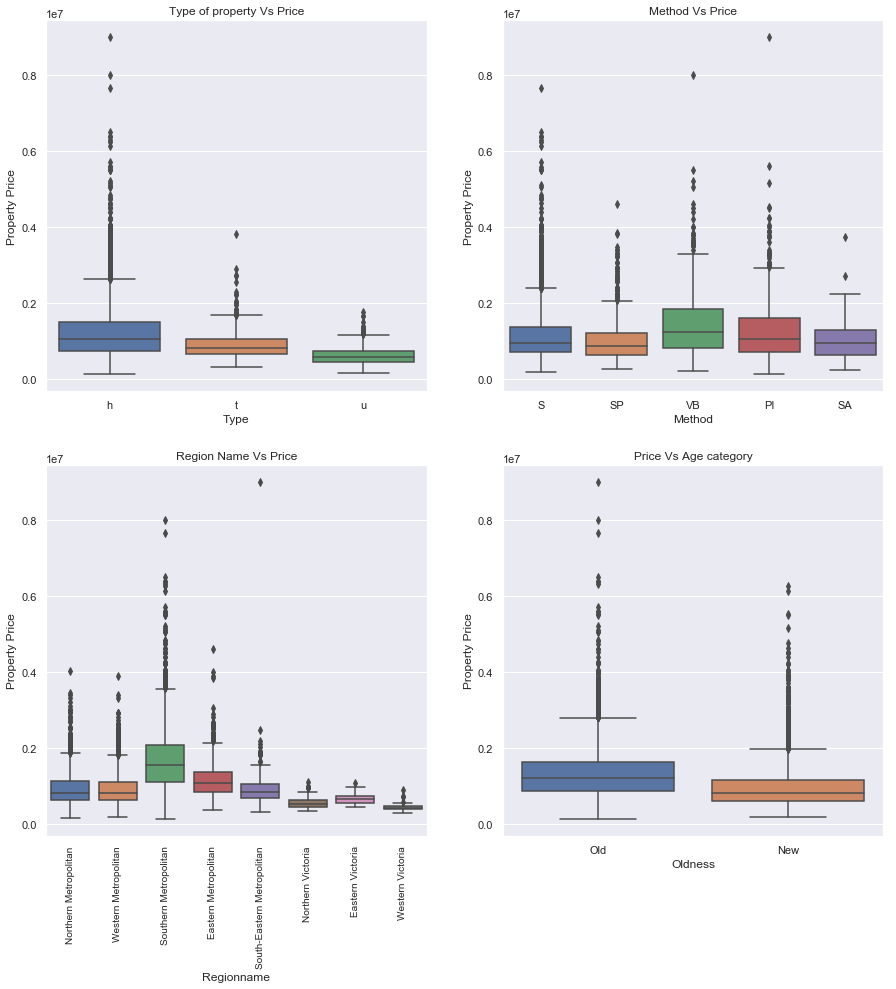

In [521]:

sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

ax = plt.subplot(221)
sns.boxplot(data = d, x = 'Type', y = 'Price')
plt.xlabel('Type')
plt.ylabel('Property Price')
plt.title('Type of property Vs Price')

ax1 = plt.subplot(222)
sns.boxplot(x = 'Method', y = 'Price', data = d)
plt.xlabel('Method')
plt.ylabel('Property Price')
plt.title('Method Vs Price')

ax2=plt.subplot(223)
sns.boxplot(x = 'Regionname', y = 'Price', data = d)
plt.xlabel('Regionname')
plt.xticks(rotation=90,size=10)
plt.ylabel('Property Price')
plt.title('Region Name Vs Price')

ax3 = plt.subplot(224)
sns.boxplot(x = 'Historic', y = 'Price', data = d)
plt.xlabel('Oldness')
plt.ylabel('Property Price')
plt.title('Price Vs Age category')

plt.show()

From the above boxplot we get several insights. To begin with, old properties worth more and have a higher price variance than new properties. Southern Metropolitan is the most expensive area and the prices has high variance. That tells me that sellers can easily manipulate prices. Properties of type house are naturally more expensive with high variance whereas properties of type 't' and 'u' are cheaper and their price is fixed. Lastly, home prices with different selling methods are relatively the same across the board.

## 3. Data analysis

### 3.1 Basic data analysis

#### 3.1.1 Regional Analysis

It is safe to assume that the larger the number of rooms in a property, the more expensive it will be. In order to make a quantitative comparison of how expensive a house is, we are grouping the regions and the number of rooms each property has on each region and then compare prices in every region according to the number of rooms.

In [522]:
rooms = d.groupby(['Rooms','Regionname']).mean()['Price'].unstack()
trace0 = go.Bar(
    x=rooms.index,
    y=rooms['Eastern Metropolitan'],
    name='Eastern Metropolitan',
    marker=dict(
        color='aquamarine'
    )
)
trace1 = go.Bar(
    x=rooms.index,
    y=rooms['Eastern Victoria'],
    name='Eastern Victoria',
    marker=dict(
        color='goldenrod'
    )
)

trace2 = go.Bar(
    x=rooms.index,
    y=rooms['Northern Metropolitan'],
    name='Northern Metropolitan',
    marker=dict(
        color='hotpink'
    )
)


trace3 = go.Bar(
    x=rooms.index,
    y=rooms['Northern Victoria'],
    name='Northern Victoria',
    marker=dict(
        color='lightsalmon'
    )
)
trace4 = go.Bar(
    x=rooms.index,
    y=rooms['South-Eastern Metropolitan'],
    name='South-Eastern Metropolitan',
    marker=dict(
        color='orchid'
    )
)
trace5 = go.Bar(
    x=rooms.index,
    y=rooms['Southern Metropolitan'],
    name='Southern Metropolitan',
    marker=dict(
        color='peachpuff'
    )
)
trace6 = go.Bar(
    x=rooms.index,
    y=rooms['Western Metropolitan'],
    name='Western Metropolitan',
    marker=dict(
        color='turquoise'
    )
)
trace7 = go.Bar(
    x=rooms.index,
    y=rooms['Western Victoria'],
    name='Western Victoria',
    marker=dict(
        color='yellowgreen'
    )
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7]
layout = go.Layout(
    barmode='group',
    legend=dict(
        x=0.02,
        y=0.9,
        traceorder='normal',
        font=dict(
            family='Courier New, monospace',
            size=12,
            color='#000'
        ),
        bgcolor='#E2E2E2',
        bordercolor='silver',
        borderwidth=1
    ),
    title='Average price for properties with same number of rooms in each region',
                   xaxis=dict(title='Number of Rooms',titlefont=dict(family='Courier New, monospace',size=16, color='#7f7f7f')),
                   yaxis=dict(title='Average Price',titlefont=dict(family='Courier New, monospace',size=16,color='#7f7f7f')),
                 )

fig = go.Figure(data=data, layout=layout)
iplot(fig)


The above figure reveals a trend. For properties having 2 to 6 rooms the most expensive region is the Southern Metropolitan. The cheaper region for properties having 2 to 6 rooms is the Northern Victoria. In the case where the property has just 1 room, the most expensive area is the Eastern Metropolitan followed by the Southern Metropolitan. I would like to examine why properties with one room in Southern Metropolitan are less expensive than properties with one romm in Eastern metropolitan.

In [581]:
d.groupby(['Rooms','Regionname']).mean()['BuildingArea'].unstack()

Regionname  Eastern Metropolitan  Eastern Victoria  Northern Metropolitan  \
Rooms                                                                       
1                     103.000000         42.000000              53.571429   
2                      97.136044         81.790000              95.216427   
3                     142.434229        117.792000             131.836946   
4                     205.567164        245.579474             184.086181   
5                     272.518500        215.187500             241.819747   
6                     277.666667               NaN             269.250000   

Regionname  Northern Victoria  South-Eastern Metropolitan  \
Rooms                                                       
1                         NaN                   65.000000   
2                   61.000000                  103.347826   
3                  138.563529                  134.797473   
4                  194.066000                  193.998077   
5                  190.500000                  217.958333   
6                  405.000000                  351.333333   

Regionname  Southern Metropolitan  Western Metropolitan  Western Victoria  
Rooms                                                                      
1                       60.148837             56.952941               NaN  
2                       95.675995            100.813618               NaN  
3                      151.069925            140.499919         109.32750  
4                      227.828192            192.639543         161.71875  
5                      304.499167            255.043902         280.00000  
6                      315.647059            286.500000               NaN

Apparently, the size of the building area affects the price of the one room properties. Eastern Metropolitan properties for one room apartment has much larger buiding size than the respective Southern Metropolitan and that explains the deviation from the trend from the figure above. According to the above information, we can  derive that most expensive region is the Southern Metropolitan. Followed on that I would like to investigate what drives the expensiveness of each region. So, what will follow the analysis is a plot with the distances of each region from the central business district(CBD).



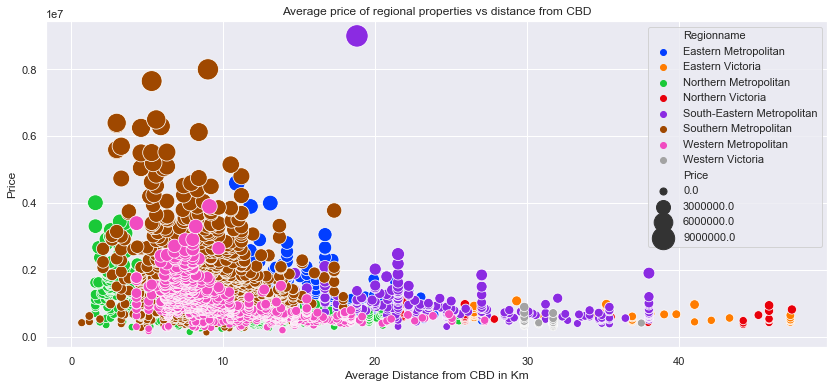

In [524]:
k1 = d.groupby(['Regionname','Price'])['Distance'].mean().reset_index()
k1.rename(columns={'Distance':'Average Distance from CBD in Km'}, inplace=True)

fig, ax = plt.subplots(figsize=(14,6))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x='Average Distance from CBD in Km', y="Price", hue='Regionname', size="Price",
                     palette="bright",alpha =1 ,
sizes=(50, 500), data=k1)
ax.set_title('Average price of regional properties vs distance from CBD')
plt.show()

The above figure states that most of the Southern Metropolitan properties are located near the CBD and they are among the most expensive properties. On the other hand, other Metropolitan regional properties are also located near the CBD but many of them are also spread quite far from it. Nevertheless , their prices are consideraby lower than the ones in the Southern Metropolitan. The above figure is also indicative of the number of houses sold in each region. Most houses are sold in Southern Metropolitan, Western and Northern Metropolitan whilst the least of the houses are sold in all the Victorian regions. 

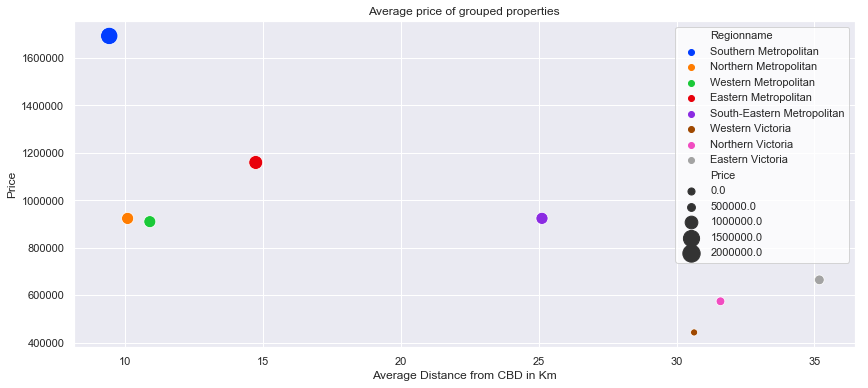

In [525]:
k = d.groupby(['Regionname'])['Distance','Price'].mean().sort_values('Distance').reset_index()
k.rename(columns={'Distance':'Average Distance from CBD in Km'}, inplace=True)

fig, ax = plt.subplots(figsize=(14,6))
sns.set(style='white')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Average Distance from CBD in Km", y="Price", hue='Regionname', size="Price",
                     palette="bright",alpha = 1,
sizes=(50, 300), data=k)
ax.set_title('Average price of grouped properties')
plt.show()
#ax.grid(False)

The above plot confirms that the highest valued properties belong to the Southern Metropolitan region and this region is the closest one from the CBD. The next highest valued properties are in the Eastern Metropolitan Region but they are more far away than the Northern and Western Metropolitan which are both closer to the CBD. Final thing in the regional analysis, is to see how much percentage of the total sales accounts for each region.

In [582]:
total_sales = d.Price.sum()
def region_sales_percentage(df, region):
    sales_percentage = (d['Price'].loc[d['Regionname'] == region].sum()/total_sales) * 100
    return sales_percentage

# Total Sales Sum per Region
nts = d['Price'].loc[d['Regionname'] == 'Northern Metropolitan'].sum()
wts = d['Price'].loc[d['Regionname'] == 'Western Metropolitan'].sum()
sts = d['Price'].loc[d['Regionname'] == 'Southern Metropolitan'].sum()
ets = d['Price'].loc[d['Regionname'] == 'Eastern Metropolitan'].sum()
sets = d['Price'].loc[d['Regionname'] == 'South-Eastern Metropolitan'].sum()
nvs = d['Price'].loc[d['Regionname'] == 'Northern Victoria'].sum()
wts = d['Price'].loc[d['Regionname'] == 'Western Victoria'].sum()
evts = d['Price'].loc[d['Regionname'] == 'Eastern Victoria'].sum()



# Sales percentage per Region
nms = region_sales_percentage(d, region='Northern Metropolitan')
wms = region_sales_percentage(d, region='Western Metropolitan')
sms = region_sales_percentage(d, region='Southern Metropolitan')
ems = region_sales_percentage(d, region='Eastern Metropolitan')
sems = region_sales_percentage(d, region='South-Eastern Metropolitan')
nvis = region_sales_percentage(d, region='Northern Victoria')
wvs = region_sales_percentage(d, region='Western Victoria')
evs = region_sales_percentage(d, region='Eastern Victoria')


labels = ['Northern <br> Metropolitan', 'Western <br> Metropolitan', 'Southern <br> Metropolitan', 'Eastern <br> Metropolitan', 
         'South-Eastern <br> Metropolitan', 'Northern <br> Victoria', 'Western <br> Victoria', 'Eastern <br> Victoria']

salesper_data = [nms, wms, sms, ems, 
              sems, nvis, wvs, evs]

total_sales_data = [nts, wts, sts, ets, sets, nvs, wts, evts]


trace1 = go.Bar(
    x=salesper_data,
    y=labels,
    xaxis='x1',
    yaxis='y1',
    marker=dict(
        color='rgba(152, 251, 152, 0.6)',
        line=dict(
            color='rgba(12, 218, 12, 1)',
            width=1),
    ),
    name='Sales Percentage of Houses per Region',
    orientation='h'
)

trace2 = go.Scatter(
    x=total_sales_data,
    y=labels,
    mode='markers',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='rgb(34, 178, 178)',
    size=8),
    name='Total Sales per Region / (in Australian Dollars ($AUD))'
)


data = [trace1, trace2]
layout = go.Layout(
    legend=dict(x=.2, y=1.2),
    xaxis=dict(
        domain=[0.07, 0.47],
    title='Sales Percentage',titlefont=dict(family='Courier New, monospace',size=16, color='#7f7f7f'),
                 
    ),
    yaxis=dict(
        domain=[0, 1],
      title='Region',titlefont=dict(family='Courier New, monospace',size=16, color='#7f7f7f'),  
    ),

    xaxis2=dict(
        domain=[0.5, 1],
        title='Total Sales',titlefont=dict(family='Courier New, monospace',size=16, color='#7f7f7f'),
    ),
    yaxis2=dict(
        domain=[0, 1],
        anchor='x1'
    ),
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

The above plot shows that Southern metropolitan accounts for 40% of the properties sold in Melbourne for a total of 3.62 Billions

#### 3.1.2 Temporal Analysis

Next part this EDA is to explore the prices through time. Moreover, we want to see the price changes on time for the different regions. That way we can potentially spot developing areas. We do not have enough data for 2018, so we will compare the time evolution for 2016 and 2017. After that, we will compare the three yearly prices just on the time interval we have common data for.

In [527]:
year=[2016,2017]
d1 = d[d.year.isin(year)]

In [528]:
yereg = d1.groupby(['Regionname','year']).mean()['Price'].unstack()
trace0 = go.Bar(
    x=yereg.index,
    y=yereg.values[:,0],
    name='2016',
    marker=dict(
        color='aquamarine'
    ))
trace1 = go.Bar(
    x=yereg.index,
    y=yereg.values[:,1],
    name='2017',
    marker=dict(
        color='#e377c2'
    ))
    
data = [trace0,trace1]
layout = go.Layout(
    autosize=True,
    margin=dict(
        b=120
    ),
    annotations=[
        dict(
            x=0.500,
            y=-0.4,
            font=dict(family='Courier New, monospace',size=16, color='#7f7f7f'),
            showarrow=False,
            text='Region',
            xref='paper',
            yref='paper'
        ),
        dict(
            x=-0.1,
            y=0.5,
            showarrow=False,
            font=dict(family='Courier New, monospace',size=16, color='#7f7f7f'),
            text='Average Property Price',
            textangle=-90,
            xref='paper',
            yref='paper'
        )
    ],
    barmode='group',
    legend=dict(
        x=0.02,
        y=0.9,
        traceorder='normal',
        font=dict(
            family='Courier New, monospace',
            size=12,
            color='#000'
        ),
        bgcolor='#E2E2E2',
        bordercolor='silver',
        borderwidth=1
    ),
    title='Prices changes in Melbourne Regions during 2016 and 2017',)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

    

The above plot is really interesting and it reveals two main points. In the Northern and Western Metropolitan region the prices have slightly decreased from 2016 to 2017 while on the Eastern, South Eastern Metropolitan and Southern Metropolitan, the prices have increased. The second main point is that in the Victoria region no houses were sold in 2016 whereas in 2017 people started purchasing. That is indicative of the house bubble we are trying to reveal as people seeing house purchasing an attractive investment due to increasing prices from previous year.

My next step is to find which months are common for all three years and make a price and number of houses sold comparison.

In [529]:
t1 = d[d.year == 2016]
t2 = d[d.year == 2017]
t3 = d[d.year == 2018] 
common_months = np.intersect1d(t1.month, np.intersect1d(t2.month, t3.month))
for i in range(len(common_months)):
    print('The common months in all three years is', calendar.month_name[common_months[i]], common_months[i])

The common months in all three years is March 3
The common months in all three years is June 6
The common months in all three years is October 10


In [530]:
#isolating the common months in all three years
month= [3,6,10]
m1 = t1[t1.month.isin(common_months)]
m2 = t2[t2.month.isin(common_months)]
m3 = t3[t3.month.isin(common_months)]

In [531]:
pm1 = m1.groupby(['month']).mean()['Price']
pm2 = m2.groupby(['month']).mean()['Price']
pm3 = m3.groupby(['month']).mean()['Price']
yg1= m1.groupby(['month']).size()
yg2= m2.groupby(['month']).size()
yg3= m3.groupby(['month']).size()

In [532]:
trace0 = go.Bar(
    x=pm1.index,
    y=pm1.values,
    name='2016',
    marker=dict(
        color='aquamarine'
    ))
trace1 = go.Bar(
    x=pm2.index,
    y=pm2.values,
    name='2017',
    marker=dict(
        color='#e377c2'
    ))
trace2 = go.Bar(
    x=pm3.index,
    y=pm3.values,
    name='2018',
    marker=dict(
        color='rgb(34, 178, 178)'
    ))

trace3 = go.Bar(
    showlegend=False,
    x=yg1.index,
    y=yg1.values,
    name='Number of Properties 2016',
    marker=dict(
        color='aquamarine'
    ))
trace4 = go.Bar(
    showlegend=False,
    x=yg2.index,
    y=yg2.values,
    name='Number of Properties 2017',
    marker=dict(
        color='#e377c2'
    ))
trace5 = go.Bar(
    showlegend=False,
    x=yg3.index,
    y=yg3.values,
    name='Number of Properties 2018',
    marker=dict(
        color='rgb(34, 178, 178)'
    ))


fig = tools.make_subplots(rows=2, cols=1,
                         subplot_titles=
                          ('Average property prices for March, June and October for year 2016, 2017, 2018',
                           'Number of properties sold for March, June and October for year 2016, 2017, 2018'))                         

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 1)
fig['layout'].update(height=750, width=805)

fig['layout']['xaxis1'].update(title='Month',tickvals=[3,6,10],ticktext=['March', 'June','October'])
fig['layout']['xaxis2'].update(title='Month',tickvals=[3,6,10],ticktext=['March', 'June','October'])
fig['layout']['yaxis1'].update(title='Price')
fig['layout']['yaxis2'].update(title='Number of properties')

iplot(fig)

    

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



The data for 2016 and 2017 shows that the number of properties bought has been increasing from the previous year. Moreover, during March 2018 we notice a spike of sold properties, which is probably a continuation of the increased sales from October 2017. After March 2018, the number of properties sold drops dramatically in October 2018. We correlate the observations of this figure with the one on the prices. The housing market in Melbourne spiked in October 2016 because both the house sold and the average price has increased since June 2016. In March 2017, the amount of sold properties is increasing but the average price is dropping, due to the fact that people started buying cheaper houses. During June 2017 the prices remained the same as the previous quarter but fewer properties are sold. In October 2017, again the prices remain the same but the number of houses sold is spiking. It seems that the number of properties sold during the end of the year is increasing so far. In March 2018, Both properties sold and prices are increasing and it is the beginning of the downfall, as we see that during the rest of the year, both the prices and the properties sold skydives. The potential house market bubbles had already started in March 2016 and it popped at some point between March and June 2018.


Last thing to examine from the data, is the number of properties built in the recent years. 

In [533]:
yb = d[d.YearBuilt > 2000]
yb = yb[yb.YearBuilt < 2018]
years = yb.groupby(['YearBuilt']).size()
trace0 = go.Scatter(
    x = years.index,
    y = years.values,
    mode = 'lines'
)
data = [trace0]

layout1 = dict(title = 'Properties Built in Melbourne from 2001-2017',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Number of Properties'),)
fig = dict(data=data, layout=layout1)
iplot(fig)


In [534]:
#Taking the common months between year 2016 ans 2017
cm2 = np.intersect1d(t1.month,t2.month)
cm3 = np.asarray(cm2)
cm11 = t1[t1.month.isin(cm3)]
cm12 = t2[t2.month.isin(cm3)]
print('The total value of houses sold in 2016 is', cm11.Price.sum(), 'and' )
print('The total value of houses sold in 2017 is', cm12.Price.sum())

The total value of houses sold in 2016 is 3398916510.0 and
The total value of houses sold in 2017 is 4064157634.0


The plot of the number of houses built from 2001-2017 reveals and increasing building behaviour until 2013. This tells us that the supply for housing was ramping up. After 2013 the supply was reduced but not necessarily the demand. 2016 and 2017 the houses built are dropping significantly, whereas the total value of houses sold from 2016 to 2017 increases. This suggests either increasing demand or higher prices. Now, it is a good time to explore human psychology in a housing bubble. Bubbles are crowd psychology phenomena. When a crowd believes that an asset can only go up, and is in some way scarce, the crowd suspends prudence and rushes to buy. A bubble will always have signs of a buying panic; “you have to get in now, you may never be able to again” is often heard. In market language, this is called fear of missing our or simply FOMO. Other signs you would expect to see in a housing bubble apart from the ones we discussed earlier are low available inventory ( as the one we notice in the previous plot) and far more buyers than sellers which causes the prices to spike as we see from the total value of the properties sold in 2016 and 2017.

#### 3.1.3 Exploring Melbourne

After confirming from the available data that the housing market in Melbourne is in a bubble and have an idea of what drives the prices it is time to explore some correlations between the variables. 

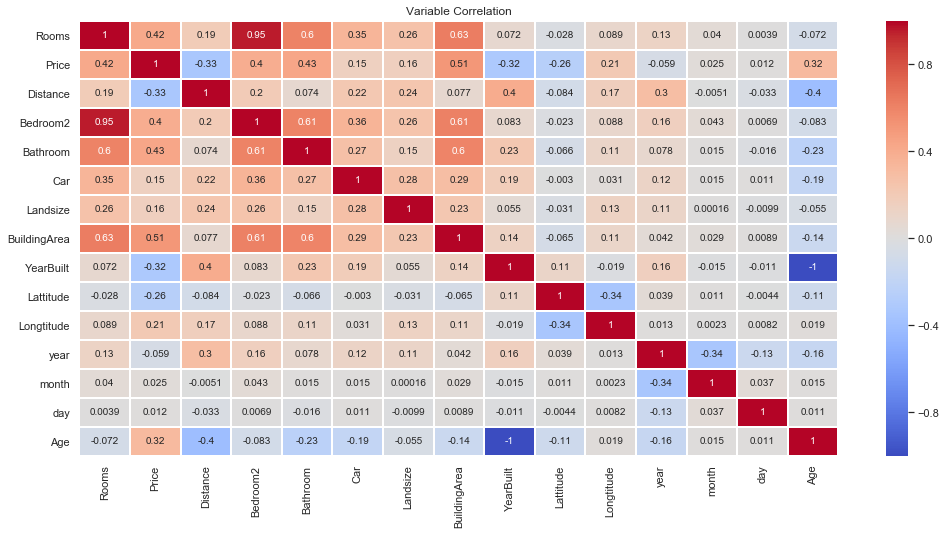

In [535]:
plt.figure(figsize=(17,8))
sns.heatmap(d.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 10})
plt.title('Variable Correlation')
plt.show()

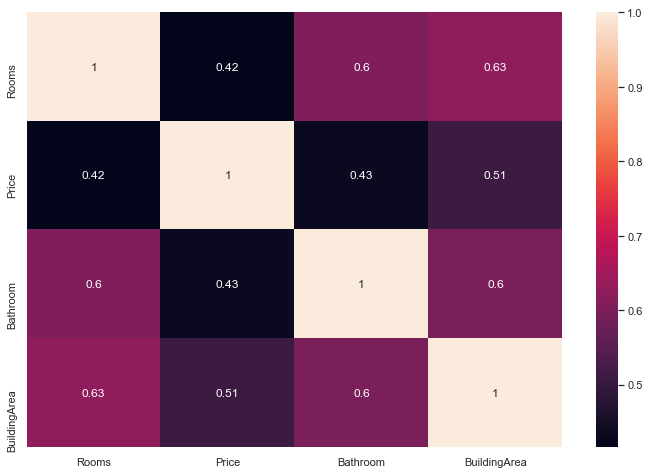

In [536]:
corr=d.corr()
top_feature = corr.index[abs(corr['Price']>0.4)]
plt.subplots(figsize=(12, 8))
top_corr = d[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

As we expected, Rooms, Bedrooms, Bathroom and Building are positively correlated with one another as they are a measure of property size. What is also proven from the analysis we made earlier there is a negative correlation on Distance, YearBuilt. As a negative correlation, we define that there is an inverse relationship between the variables. When Distance decreases(From the CBD) the price increases and the same happened with the YearBuilt. The smaller the YearBuilt thus the larger the Age the prices tends to increase. 


We would also like to make use of the longtitude and latitude data at our disposal and create some maps and visualize important attributes.

In [537]:
dprice = d[d['Price']<7000000]
plot1 = go.Scatter(x = dprice.Longtitude, y = dprice.Lattitude, mode='markers',
                marker = dict(color = dprice.Price, colorscale='YlOrRd',reversescale=True, showscale=True,colorbar=dict(title="Price Range"),),
                
                )

plot2 = go.Scatter(x = d.Longtitude, y = d.Lattitude, mode='markers',
                marker = dict(color = d.Distance, colorscale='Jet',reversescale=True, showscale=True,colorbar=dict(title="Distance from CBD"),),
                
                )

plot3 = go.Scatter(x = d.Longtitude, y = d.Lattitude, mode='markers',
                marker = dict(color = d.YearBuilt, colorscale='Electric',reversescale=True, showscale=True,colorbar=dict(title="Year Built"),),
                
                )


data=[plot1,plot2,plot3]

updatemenus = list([
    dict(active=-1,
         buttons=list([
            dict(label = 'Price',
                 method = 'update',
                 args = [{'visible': [True, False, False]},
                         {'title': 'Price of Properties in Melbourne'}]),
            dict(label = 'Distance',
                 method = 'update',
                 args = [{'visible': [False, True,False]},
                         {'title': 'Distance of Properties from CBD'}]),
            dict(label = 'Year built',
                 method = 'update',
                 args = [{'visible': [False,False, True]},
                         {'title': 'Year Built of Properties in Melbourne'}]),
        ]),
    )
])








layout = dict(title='Choose the map from the dropdown menu',
              xaxis=dict(title='Longitude',titlefont=dict(family='Courier New, monospace',size=16, color='#7f7f7f')),
              yaxis=dict(title='Latitude',titlefont=dict(family='Courier New, monospace',size=16,color='#7f7f7f')),
              width=800,height=700, margin=go.Margin( l=40, r=25, b=100, t=100, pad=4),
              font=dict(family='Open Sans', size=12),
              showlegend=False,
              paper_bgcolor='rgb(255, 255, 255)',
              plot_bgcolor='rgb(255, 255, 255)',
              updatemenus=updatemenus)



fig = dict(data=data, layout=layout)
iplot(fig)

The price map shows that most of the expensive properties are around the centre of Melbourne and as we move away from the centre the properties are becoming cheaper. On the distance map, we can clearly see where the CBD area is that we have been talking about in previous sections and lastly on the YearBuilt map we see the year that the properties are built. The oldest properties are located near the CBD which also explains why they are also more expensive than the ones built in later years. 

Last but not least, we would like to explore atrributes in specific Council Areas and suburbs. We will create two interactive visualizations where we can see distributions, such as 'Distance', 'YearBuilt', 'Price', 'Landsize' and 'BuildingArea' for the top 20 Council Areas and Suburbs in Melbourne.

In [587]:
cols  = ['CouncilArea','Distance','YearBuilt','Price','Landsize','BuildingArea'];
col_analysis  = ['Distance','YearBuilt','Price','Landsize','BuildingArea']



# drop down names:
Keys = {'Distance':  'Distance from Downtown',
        'YearBuilt':'# of Rooms',
        'Price':'Property Price',
        'Landsize':'Property Landsize',
        'BuildingArea': 'Property Building Area'}

dropdown_names = {'Distance':  'Distance from CBD',
                  'YearBuilt':'Year Built', 
                  'Price':'Property Price',
                 'Landsize':'Property Landsize',
                  'BuildingArea': 'Property Building Area'}

colors = {'Distance':  'blueviolet',
          'YearBuilt':'salmon', 
          'Price':'#FFD7E9',
         'Landsize':'deepskyblue',
         'BuildingArea':'paleturquoise'}

# drop down names:
drop_buttons = {
    'Distance':  [True, False, False,False,False],
    'YearBuilt':[False, True, False,False,False],
    'Price':[False, False, True,False,False],
    'Landsize':[False, False,False, True,False],
    'BuildingArea':[False, False, False,False, True],
}

# will be used for new plots
CA_count = d.CouncilArea.value_counts()


# group data & filter data
df_councils = d[cols].groupby(['CouncilArea']).mean().dropna()




buttons = []; data = []

for col in col_analysis:
    cas = df_councils.sort_values(col,ascending=0).index.tolist()[:20]
    data.append(go.Box(x=d[d.CouncilArea.isin(cas)]['CouncilArea'],
                       y=d[d.CouncilArea.isin(cas)][col],
                       visible= drop_buttons[col][0],
                       marker = dict(color = colors[col]),
                       name=dropdown_names[col],
                           showlegend=True))
    
    buttons.append(dict(label = dropdown_names[col],
                        method = 'restyle',
             args = ['visible', drop_buttons[col], 
                     'title', title[col]]))
   
updatemenus = list([
    dict(active=-1,
         buttons=list([
            dict(label = 'Distance',
                 method = 'update',
                 args = [{'visible': [True, False, False,False,False]},
                         {'title': 'Distance of Properties From CBD<br><sub>Top 20 Council Areas</sub>'}]),
            dict(label = 'Year',
                 method = 'update',
                 args = [{'visible': [False, True,False,False,False]},
                         {'title': 'Year Built of Properties in Council Areas<br><sub>Top 20 Council Areas</sub>'}]),
            dict(label = 'Price',
                 method = 'update',
                 args = [{'visible': [False,False, True,False,False]},
                         {'title': 'Price of properties in Council Areas<br><sub>Top 20 Council Areas</sub>'}]),
              dict(label = 'Landsize',
                 method = 'update',
                 args = [{'visible': [False,False,False, True,False]},
                         {'title': 'Landsize of Properties in Council Areas<br><sub>Top 20 Council Areas</sub>'}]),
              dict(label = 'BuildingArea',
                 method = 'update',
                 args = [{'visible': [False,False,False,False, True]},
                         {'title': 'BuildingArea of Properties in Council Areas<br><sub>Top 20 Council Areas</sub>'}]),
        ]),
    )
])


layout = dict(title='Distributions by CouncilArea <br><sub>Select your type of distribution in drop down menu</sub>', 
              width=750,height=600, margin=go.Margin( l=50, r=25, b=150, t=100, pad=4),
              font=dict(family='Open Sans', size=12),
              showlegend=False,
              paper_bgcolor='rgb(255, 255, 255)',
              plot_bgcolor='rgb(255, 255, 255)',
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
iplot(fig)

In [539]:
cols  = ['Suburb','Distance','YearBuilt','Price','Landsize','BuildingArea'];
col_analysis  = ['Distance','YearBuilt','Price','Landsize','BuildingArea']



# drop down names:
Keys = {'Distance':  'Distance from Downtown',
        'YearBuilt':'# of Rooms',
        'Price':'Property Price',
        'Landsize':'Property Landsize',
        'BuildingArea': 'Property Building Area'}

dropdown_names = {'Distance':  'Distance from CBD',
                  'YearBuilt':'Year Built', 
                  'Price':'Property Price',
                 'Landsize':'Property Landsize',
                  'BuildingArea': 'Property Building Area'}

colors = {'Distance':  'blueviolet',
          'YearBuilt':'salmon', 
          'Price':'#FFD7E9',
         'Landsize':'deepskyblue',
         'BuildingArea':'paleturquoise'}

# drop down names:
drop_buttons = {
    'Distance':  [True, False, False,False,False],
    'YearBuilt':[False, True, False,False,False],
    'Price':[False, False, True,False,False],
    'Landsize':[False, False,False, True,False],
    'BuildingArea':[False, False, False,False, True],
}

# will be used for new plots
CA_count = d.Suburb.value_counts()


# group data & filter data
df_councils = d[cols].groupby(['Suburb']).mean().dropna()




buttons = []; data = []

for col in col_analysis:
    cas = df_councils.sort_values(col,ascending=0).index.tolist()[:20]
    data.append(go.Box(x=d[d.Suburb.isin(cas)]['Suburb'],
                       y=d[d.Suburb.isin(cas)][col],
                       visible= drop_buttons[col][0],
                       marker = dict(color = colors[col]),
                       name=dropdown_names[col],
                           showlegend=True))
    
    buttons.append(dict(label = dropdown_names[col],
                        method = 'restyle',
             args = ['visible', drop_buttons[col], 
                     'title', title[col]]))
   
updatemenus = list([
    dict(active=-1,
         buttons=list([
            dict(label = 'Distance',
                 method = 'update',
                 args = [{'visible': [True, False, False,False,False]},
                         {'title': 'Distance of Properties From CBD<br><sub>Top 20 Suburbs</sub>'}]),
            dict(label = 'Year',
                 method = 'update',
                 args = [{'visible': [False, True,False,False,False]},
                         {'title': 'Year Built of Properties in Suburbs<br><sub>Top 20 Suburbss</sub>'}]),
            dict(label = 'Price',
                 method = 'update',
                 args = [{'visible': [False,False, True,False,False]},
                         {'title': 'Price of properties in Suburbs<br><sub>Top 20 Suburbs</sub>'}]),
              dict(label = 'Landsize',
                 method = 'update',
                 args = [{'visible': [False,False,False, True,False]},
                         {'title': 'Landsize of Properties in Suburbs<br><sub>Top 20 Suburbs</sub>'}]),
              dict(label = 'BuildingArea',
                 method = 'update',
                 args = [{'visible': [False,False,False,False, True]},
                         {'title': 'BuildingArea of Properties in Suburbs<br><sub>Top 20Suburbs</sub>'}]),
        ]),
    )
])


layout = dict(title='Distributions by Suburb <br><sub>Select your type of distribution in drop down menu</sub>', 
              width=700,height=600, margin=go.Margin( l=50, r=25, b=150, t=100, pad=4),
              font=dict(family='Open Sans', size=12),
              showlegend=False,
              paper_bgcolor='rgb(255, 255, 255)',
              plot_bgcolor='rgb(255, 255, 255)',
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
iplot(fig)

### 3.2 Machine Learning


Next step in the data analysis section is Machine Learning. We will start by transforming the data and selecting features we will be using in the analysis.

### 3.2.1 Feature Transformation

From the first Regression Model we will exclude the 'Historic' feature as it is the one we created from the already existing data, the 'Date' as we have already create columns with the year, month, and day of each sold property and finally the suburb since it will create a matrix with too many columns when we perform one out of k encoding.

In [590]:
exc1 = ['Date','Historic','Suburb','Price','Type','Method','CouncilArea','Regionname']

In [591]:
y=d.Price
X1 = d.drop(columns=exc1).reset_index(drop=True)

Next step is to perfrom one out of k encoding for the categorical variables. Those are 'Type', 'Method' and 'Regionname'.

In [592]:
X2 = d[['Type','Method','Regionname']]
X2=pd.get_dummies(X2).reset_index(drop=True)

In [593]:
#Creating the feature matrix X
X=pd.concat([X1,X2], axis=1)
attributeNames = list(X)
X=X.values
y=y.values

From the basic statistics plots, we noticed the price distribution is left-skewed. We will perform a log transformation to the price. Price has a huge range of values and if perform regression analysis without transforming the data, we expect to deal with huge MSE. 

In [594]:
#Log transforming the data
y = np.log(y)
y1 = y

In [595]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=0)

For the first and third regression model that we will be running, we want to standardize the feature matrix which means to make them have a mean of zero and standard deviation of one. We standardize the X_train and X_test separately because if we would do it earlier on the whole data X we would leak information about the test set to the train set which would make our model biased.

In [596]:
#Standardizing the train and test set
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

Before moving on with regression models, we want to examine the distribution and probability plots of the price before and after the log transformation. 

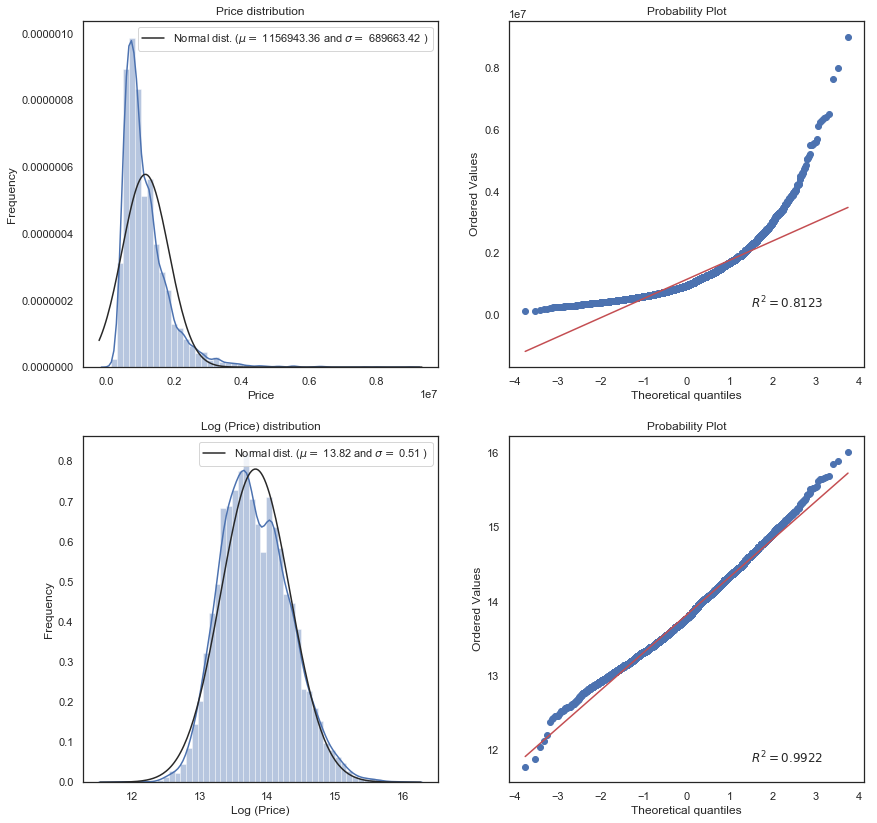

In [597]:
fig, ax = plt.subplots(figsize=(14,14))

ax = plt.subplot(221)
sns.distplot(d['Price'] , fit=norm);
(mu, sigma) = norm.fit(d['Price'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')


ax = plt.subplot(222)
res = stats.probplot(d['Price'], plot=plt, rvalue=True)


ax = plt.subplot(223)
sns.distplot(y1 , fit=norm);
(mu2, sigma2) = norm.fit(y1)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu2, sigma2)],
            loc='best')
plt.ylabel('Frequency')
plt.xlabel('Log (Price)')
plt.title('Log (Price) distribution')


ax = plt.subplot(224)
res = stats.probplot(y1, plot=plt, rvalue=True)




In the top two plots, we see the distribution and the probability plot of the original data, whereas on the two bottom plots, is the price distribution and probability plot after the log transformation. This transformation will help us interpret better the results and avoid huge Mean Squared Errors that could potentially be caused by the large values on the original prices.

### 3.2.2  Regression Models

#### 3.2.2.1 Linear Regression Model

In [598]:
lng = linear_model.LinearRegression()
lng.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [599]:
print("The Linear Regression model predicts the price of a property to be " + str(lng.predict([X_test[4]])))
print("The Real price of the property is " + str(y_test[2]))
y_pred1 = lng.predict(X_test)
Actual_Price=y_test

The Linear Regression model predicts the price of a property to be [13.31]
The Real price of the property is 14.547878451677501


In [600]:
#Mean squared error
print("Mean squared Test error: %.2f"
      % mean_squared_error(y_test, y_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, y_pred1))


Mean squared Test error: 0.07
Variance score: 0.73438


#### 3.2.2.2 Ridge Regression with lambda parameter tuning

In [601]:
# This is a function that performs internal cross validation and calculates important parameteres for the model
def rlr_validate(X,y,lambdas,cvf=10):

    CV = model_selection.KFold(cvf, shuffle=True)
    M = X.shape[1]
    w = np.empty((M,cvf,len(lambdas)))
    train_error = np.empty((cvf,len(lambdas)))
    test_error = np.empty((cvf,len(lambdas)))
    f = 0
    y = y.squeeze()
    for train_index, test_index in CV.split(X,y):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        
        # Standardize the training and set set based on training set moments
        mu = np.mean(X_train[:, 1:], 0)
        sigma = np.std(X_train[:, 1:], 0)
        
        X_train[:, 1:] = (X_train[:, 1:] - mu) / sigma
        X_test[:, 1:] = (X_test[:, 1:] - mu) / sigma
        
        # precompute terms
        Xty = X_train.T @ y_train
        XtX = X_train.T @ X_train
        for l in range(0,len(lambdas)):
            # Compute parameters for current value of lambda and current CV fold
            # note: "linalg.lstsq(a,b)" is substitue for Matlab's left division operator "\"
            lambdaI = lambdas[l] * np.eye(M)
            lambdaI[0,0] = 0 # remove bias regularization
            w[:,f,l] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
            # Evaluate training and test performance
            train_error[f,l] = np.power(y_train-X_train @ w[:,f,l].T,2).mean(axis=0)
            test_error[f,l] = np.power(y_test-X_test @ w[:,f,l].T,2).mean(axis=0)
    
        f=f+1

    opt_val_err = np.min(np.mean(test_error,axis=0))
    opt_lambda = lambdas[np.argmin(np.mean(test_error,axis=0))]
    train_err_vs_lambda = np.mean(train_error,axis=0)
    test_err_vs_lambda = np.mean(test_error,axis=0)
    mean_w_vs_lambda = np.squeeze(np.mean(w,axis=1))
    
    return opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda

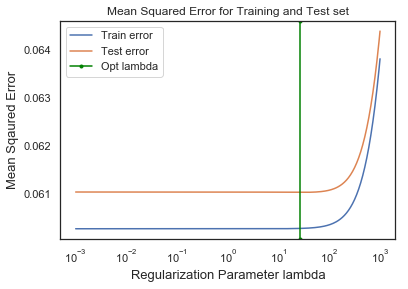

Linear regression without feature selection:
- Training error: 0.06019228142096443
- Test error:     0.0608049261215461
- R^2 train:     0.7692622571316771
- R^2 test:     0.7667084127605703

Regularized linear regression:
- Training error: 0.0601981264987844
- Test error:     0.06080176910291847
- R^2 train:     0.7692398509355465
- R^2 test:     0.7667205253628473

The optimum regularization parameter lambda is: 25.984581049292473
Weights in last fold:
         Offset           13.83
          Rooms            0.07
       Distance           -0.24
       Bedroom2            0.01
       Bathroom            0.07
            Car            0.03
       Landsize            0.02
   BuildingArea            0.12
      YearBuilt           -0.05
      Lattitude           -0.06
     Longtitude            0.09
           year            0.03
          month            0.01
            day            -0.0
            Age            0.05
         Type_h            0.05
         Type_t            0.

In [602]:
#We perform two layer cross validation
N, M = X.shape
X = np.concatenate((np.ones((X.shape[0],1)),X),1)
attributeNames = [u'Offset']+attributeNames
M = M+1

# Crossvalidation
# Creating crossvalidation partition for evaluation
K = 5
CV = model_selection.KFold(K, shuffle=True)
#CV = model_selection.KFold(K, shuffle=False)

# Values of lambda
lambdas = np.logspace(-3,3,300)
#Creating empty arrays to store values
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_rlr = np.empty((K,1))
Error_test_rlr = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))
w_rlr = np.empty((M,K))
mu = np.empty((K, M-1))
sigma = np.empty((K, M-1))
w_noreg = np.empty((M,K))

k=0

for train_index, test_index in CV.split(X,y):
    
    # extracting training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    internal_cross_validation = 5    
    
    opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)
    mu[k, :] = np.mean(X_train[:, 1:], 0)
    sigma[k, :] = np.std(X_train[:, 1:], 0)
    
    X_train[:, 1:] = (X_train[:, 1:] - mu[k, :] ) / sigma[k, :] 
    X_test[:, 1:] = (X_test[:, 1:] - mu[k, :] ) / sigma[k, :] 
    
    Xty = np.matmul(X_train.T,y_train)
    XtX = np.matmul(X_train.T,X_train)
    
    # Computing mean squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum(axis=0)/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum(axis=0)/y_test.shape[0]

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    # Compute mean squared error with regularization with optimal lambda
    Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test_rlr[k] = np.square(y_test-X_test @ w_rlr[:,k]).sum(axis=0)/y_test.shape[0]

    # Estimating weights for unregularized linear regression, on entire training set
    w_noreg[:,k] = np.linalg.solve(XtX,Xty).squeeze()
    # Computing mean squared error without regularization
    Error_train[k] = np.square(y_train-X_train @ w_noreg[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test[k] = np.square(y_test-X_test @ w_noreg[:,k]).sum(axis=0)/y_test.shape[0]
    # Display the results for the last cross-validation fold
    k+=1
plt.figure(figsize=(6,4)); 
plt.semilogx(lambdas,train_err_vs_lambda.T,lambdas,test_err_vs_lambda.T)
plt.xlabel('Regularization Parameter lambda', fontsize=13)   
plt.ylabel('Mean Sqaured Error', fontsize=13) 
plt.axvline(opt_lambda, color = 'green', marker = ".")
plt.legend(['Train error','Test error','Opt lambda'])
plt.title('Mean Squared Error for Training and Test set') 

    
plt.show()

# Display results
print('Linear regression without feature selection:')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Regularized linear regression:')
print('- Training error: {0}'.format(Error_train_rlr.mean()))
print('- Test error:     {0}'.format(Error_test_rlr.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_rlr.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}\n'.format((Error_test_nofeatures.sum()-Error_test_rlr.sum())/Error_test_nofeatures.sum()))
print('The optimum regularization parameter lambda is:', opt_lambda)
print('Weights in last fold:')
for m in range(M):
    print('{:>15} {:>15}'.format(attributeNames[m], np.round(w_rlr[m,-1],2)))


The Ridge regression yields a lower MSE than the OLS. We found that the optimum regularization parameter is lambda=15.63. From the correlation heatmap with all the features, we notice that rooms and bedroom2 are highly correlated with a value of 0.95. It is safe to assume that those two features are a linear combination of each other and that is the reason the weight of bedroom2 is 0. There are more features with zero weight that does not affect the price and those are 'day', 'type_t', 'Method_SA', 'Method_SP', and the regions in 'Eastern Metropolitan ' and 'Eastern Victoria'. We can discard those features from the analysis. On the other hand, the most important feature that affects the price is 'Distance' from CBD. The weight of the distance indicates that for every unit decrease in the distance, the price of the property will be increased by 0.24 while holding all the rest of the feature constant.

#### 3.2.2.3 Random Forest Regressor


In [555]:
#Creating a dictionary with the range of parameters for the n_estimators
param_grid = { 
            "n_estimators" : [10,100,200,300],
            }

rfg = RandomForestRegressor()

grid = GridSearchCV(rfg, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)


k2 = pd.DataFrame(grid.cv_results_)[['mean_test_score','mean_train_score','param_n_estimators']]
k2.mean_test_score = -1*k2.mean_test_score
k2.mean_train_score = -1*k2.mean_train_score
keys = grid.cv_results_.keys()
par = grid.best_params_
print('The optimum number of estimators for the model is:', par['n_estimators'])


The optimum number of estimators for the model is: 300


In [556]:
rfg2 = RandomForestRegressor(n_estimators = par['n_estimators'])
rfg2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [557]:
print("The Random Forest Regressor predicts the price of a property to be " + str(rfg2.predict([X_test[2]])))
print("The Real price of the property is " + str(y_test[2]))
y_pred2 = rfg2.predict(X_test)
Actual_Price=y_test

The Random Forest Regressor predicts the price of a property to be [13.44]
The Real price of the property is 13.530491602931978


In [558]:
# The mean squared error
print("Mean squared Test error: %.2f"
      % mean_squared_error(y_test, y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance Test score: %.2f' % r2_score(y_test, y_pred2))



Mean squared Test error: 0.03
Variance Test score: 0.87


To sum up, we tried 3 regression models to predict the property prices in Melbourne. We used the OLS, Ridge Regression and Random Forest Regressor. In the case of the OLS, we just fitted the model using the hold one out method. In the case of the Ridge Regression, we used two layer cross-validation.  For the ridge regression we fitted a model with all of the attributes and calculated the lambda 1 regularization hyperparameter, but also fitted a baseline model with no features for the sake of comparison. Last but not least, in the case of the Random Forest Regressor, we used a built-in function GridsearchCV which performs internal cross-validations and on the same time it finds the best tuning parameters for the model. The results yield that the best model for predicting the houses prices is the Random Forest Regressor with an r-squared=0.87 and MSE=0.03. For the best model, will plot the actual property prices with the one predicted by the Random Forest Regressor.

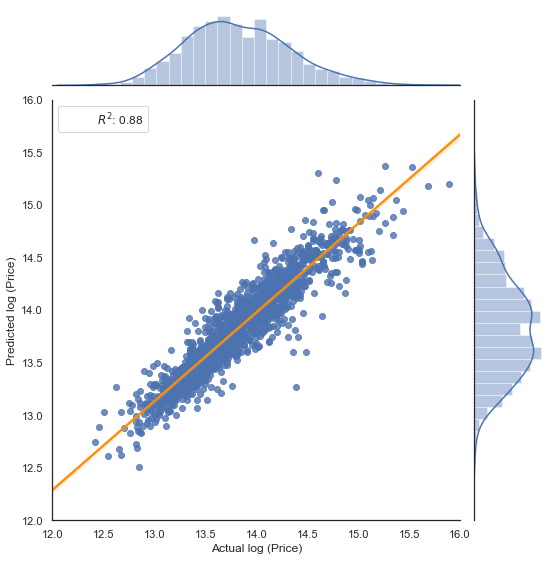

In [559]:
sns.set_style('white')


g1 = sns.jointplot(x= y_test, y= y_pred2, kind='reg', xlim=(12,16), ylim=(12,16),
                  joint_kws={'line_kws':{'color':'darkorange'}})
g1.set_axis_labels(xlabel='Actual log (Price)', ylabel='Predicted log (Price)')
rsquare = lambda a, b: stats.pearsonr(a, b)[0] ** 2
g1 = g1.annotate(rsquare, template="{stat}: {val:.2f}",
               stat="$R^2$", loc="upper left", fontsize=12)
g1.fig.set_size_inches(8,8)

plt.show()

The above plot depicts the actual log prices against the predicted log prices. We have achieved a good correlation as most of the data point are clustered together. The R-squared also verifies that much of the variance is explained by the predicted model.

### 3.2.3 Classification 


So far, we have been discussing increased properties prices, regions that are more expensive than others etc. Therefore, We would like to build a classification model that will classify the year that the specific property was built and a second classification model that will classify the properties according to the region that is located. 

For the yearly classification, we will use only the data from 2016 and 2017 and only for the months we have common data for. An alternative option would be to oversample the data for the year 2018 (using SMOTE oversampling) and create a balanced dataset for the three years but we have noticed from the data analysis above, that different months yields different property prices. So in order to remove biases from the model we only use two years with the common months. Moreover, we do not have the same amount of observation for those two years. Instead of balancing the dataset by picking the same amount of sample for both classes, we will use the data that we already have so that the model has more information to train on and we will compare the results with a higher baseline.

#### 3.2.3.1 Logistic Regression for classifying the year sold

In [560]:
exc2 = ['Date','Suburb','year','Type','Method','CouncilArea','Regionname','Historic']

In [561]:
year = [2017,2018]
d1 = d[d.year.isin(year)]

In [562]:
yn=d1.year.astype(str)
Xn1 = d1.drop(columns=exc2).reset_index(drop=True)

In [563]:
X2 = d1[['Type','Method','Regionname']]

In [564]:
X2=pd.get_dummies(X2).reset_index(drop=True)

In [565]:
#Creating the feature matrix XN
XN=pd.concat([Xn1,X2], axis=1)
attributeNames = list(XN)
classnames = list(yn.unique())
C=len(classnames)
XN=XN.values

In [566]:
v2017 = d1.loc[d1['year'] == 2017,'year'].count()
v2018 = d1.loc[d1['year'] == 2018,'year'].count()
base= v2017/(v2017+v2018)

In [567]:
print("The base line model is: {0:.2f}%, ".format(base*100))

The base line model is: 79.34%, 


In [568]:
X_train, X_test, y_train, y_test = train_test_split(XN, yn, test_size=0.1, random_state=10)

In [569]:
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

In [570]:
model = LogisticRegression()

In [571]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [572]:
y_est = model.predict(X_test)

Confusion matrix results
[[372  28]
 [ 44  47]]


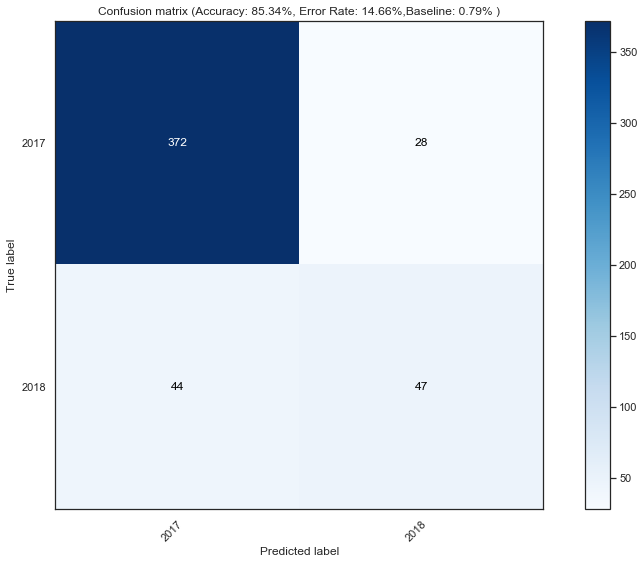

In [573]:
cm = confusion_matrix(y_test, y_est)
def plot_confusion_matrix(y_test, y_est, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_test, y_est)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix results')

    print(cm)

    fig, ax = plt.subplots(figsize=(12,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = '.3' if normalize else 'd'
    thresh = cm.max() / 3.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=3)
accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy;
plot_confusion_matrix(y_test, y_est, classes=classnames,
                      title=('Confusion matrix (Accuracy: {0:.2f}%, Error Rate: {1:.2f}%,Baseline: {2:.2f}% )'.format(accuracy, error_rate,base)))
plt.show()


The model does not perfrom great in classifying which year each property was sold. The baseline is 79% and we achieved accuracy of approximately 85% which is still better than random guessing. From the confusion matrix above we can see how the classifier performed in predicting the correctly true positives, true negatives etc..

#### 3.2.3.2 Logistic Regression for classifying the the region of each propeerty

For the regional classification, we will use the whole available data set. In some regions we have way too little observations, nevertheless, we will include them in our analysis as well to see whether the model will manage to classify some of them or will include them in more dominant regions.


In [574]:
exc3 = ['Date','Suburb','year','Type','Method','CouncilArea','Historic','Regionname']

In [575]:
yr=d.Regionname
classnames2 = list(yr.unique())
C=len(classnames2)

In [576]:
Xn2 = d.drop(columns=exc3).reset_index(drop=True)
X3 = d[['Type','Method']]
X3=pd.get_dummies(X3).reset_index(drop=True)

In [577]:
XN3 = pd.concat([Xn2,X3], axis=1)
attributeNames = list(XN3)

In [578]:
X_train, X_test, y_train, y_test = train_test_split(XN3, yr, test_size=0.2, random_state=10)
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)
model = LogisticRegression()
model.fit(X_train,y_train)
y_est = model.predict(X_test)

Confusion matrix results
[[138   0  41   0   0  18   0   0]
 [  3   0   0   0   7   0   0   0]
 [  3   0 389   1   0  25   6   0]
 [  0   0   2   2   0   0   3   1]
 [  3   0   0   0  50  13   0   0]
 [ 27   0   2   0   1 419   7   0]
 [  0   0  27   0   0   0 341   0]
 [  0   0   0   0   0   0   8   0]]


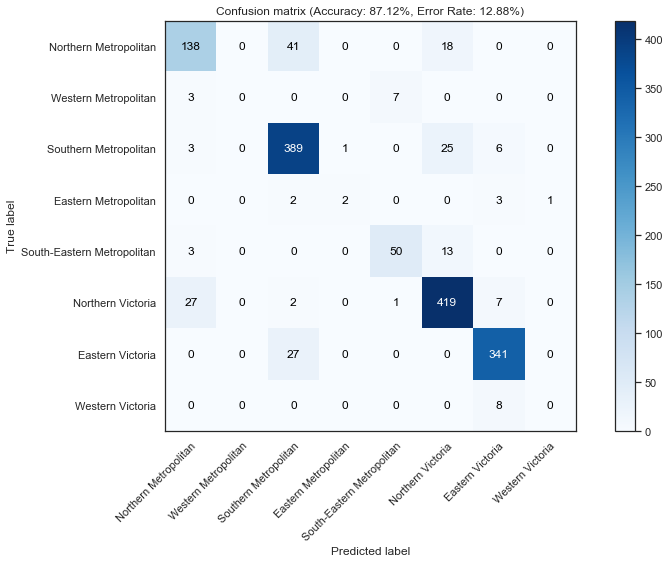

In [579]:
np.set_printoptions(precision=2)
cm2 = confusion_matrix(y_test, y_est)
accuracy2 = 100*cm2.diagonal().sum()/cm2.sum(); error_rate2 = 100-accuracy2;
plot_confusion_matrix(y_test, y_est, classes=classnames2,
                      title=('Confusion matrix (Accuracy: {0:.2f}%, Error Rate: {1:.2f}%)'.format(accuracy2, error_rate2)))
plt.show()



We have 8 classes in total and yet we achieved 88% accuracy. Of course, we should not forget that the data set is not balanced and there are significant differences in the number of observations in each class. As we suspected, the model failed to classify any observation in the Western Victoria region and the western Metropolitan region. It is possible that those regions have many similarities with others so they naturally got misclassified. Another reason could be that due to the small size of the data set, regions with a small number of observations remained in the training set and did not make it to the test set.

## 4. Genre

### 4.1 Which genre of data story did you use?

The genres we used for our data story is annotated graphs and maps. 

### 4.2 Which tools did you use from each of the 3 categories of Visual Narrative . Why?

From the visual structuring category we used the  Consistent Visual Platform and from the category highlights we used Feature Distinction. We used those tools because is easier for the user to extract the information we want to outsource. 

### 4.3 Which tools did you use from each of the 3 categories of Narrative Structure. Why?

From the category ordering we used the user directed path so as to guide the reader step by step the way we wanted to tell the story. From the category interactivity, we used Filtering/Selection/Search since so as to reduce the size of the notebook but also allow the reader to explore on his own some of the key attributes in the data set. Lastly, from the category messaging we used Captions/Headlines and Introductory Text so as to incline the reader of what we wish to show and get a quicker understanding of the visualization. 

## 5. Explain the visualizations you've chosen and why are they right for the story you want to tell?

For starters, through those visualizations we wanted the reader to understand the dataset and guide him through what drives the prices in Melbourne, if the housing market is in a bubble and what kind of predictions we can make using machine learning with the data available. In the data cleaning section, we used a heatmap so as the reader to have a visual representation of which columns and rows contain missing values and also give him the chance to judge for himself what he would do given the current data set. After removing the missing values we used a series of boxplots to further judge which observations should be removed, conclude the data cleaning and obtain the data set which we will carry on with the analysis. We carried on exploring the data set distributions using histograms and box plots and give the reader an introduction of how our basic stats look like but also give an intuition of what will we be focusing on the data analysis. Our intuition is that the more rooms each property have the more expensive it would be. So in order to make a good comparison we created a histogram that compares the property prices in each region according to the number of rooms in each property. It showed us that the most expensive region is the 'Southern Metropolitan'. Our next step was to figure out why was this the most expensive area and compared it with surrounding entities and in our case was the distance from Business District Area. Following that, we wanted to see how many people actually buy or afford to buy and it proved that 40% of the properties are purchased in that region. So far we know that Southern is the most expensive and the most popular where we concluded that it has to do with the distance from CBD. On the second part of the data analysis, we wanted to figure out if the housing market is in a bubble. We can prove that by seeing increasing property over the years. We compared regional prices where we found that prices have been increasing from the year 2017-2017 using side by side yearly histograms. Then we figured that despite the increased prices and sold properties increased from 2016-2017, the prices and numbers of properties sold dropped 33% and 77% respectively.  We assume that a housing bubble did not happen overnight but according to the data it should have happened a few months before October 2018. Our third factor was too see how the building industry in Melbourne. A simple line plot showed an increasing trend till 2012 and then very few houses were built afterwards. It was indicative of a low supply high demand behaviour for the sake of not missing a good investment. This concluded our theory about the housing bubble. The visualization continues with an interactive heatmap where we can see on a max most important attributes such as price, distance from CBD and the YearBuilt. Most of them was in the centre of CBD by the sea. To conclude, we added some noise in the story where the reader can see several boxplot distributions for Councils Areas and Suburbs in Melbourne.

In the machine learning section aims to make a prediction on prices and if we can classify the data according to year built or region. We start with the regression where we saw through a histogram and a probability plot for the price, that it did not follow normal distribution so we had to transform the data to logarithmic. After calculations, we see a scatterplot with correlation 87% on predicted and actual prices. On the classification, we create two model to predict the year sold of each property and the region it belonged. We achieved 85% and 87% respectively through a confusion matrix.

We conclude, that the available data has helped us prove through visualizations the points we had in mind.


## 6. Discussion

### 6. 1 What went well?

Through our data analysis, we successfully proved a housing bubble in Melbourne as well as what drive prices. We managed limited interactive visualizations to make the notebook more interesting to read through and made good machine learning predictions. 

### 6.2 What is still missing? What could be improved? Why?

We are missing more data from previous years to have a more concrete idea of how the market was before 2016. For example, we could identify the 2007 bubble and with some correlations or trends predict when a third housing bubble might occur.

We are also missing data from another city with the same attributes as ours and then try to classify which city is which and potentially find some trends.

Lastly, we had some temporal discontinuity in our data. If we had those data, we could be quantitatively even more accurate in our results.

## 7. Contribution

Georgios Sartzetakis s151005 was responsible for the whole ipython Explainer notebook.

Zihao Li s190042 was responsible for the whole Observable Notebook.